In [2]:
import pandas as pd
from sklearn.datasets import load_digits

digits = load_digits()
print(digits)


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)), 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_

In [3]:
df = pd.DataFrame(digits.data)
print(df.head())
print(digits.target_names)

    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]
[0 1 2 3 4 5 6 7 8 9]


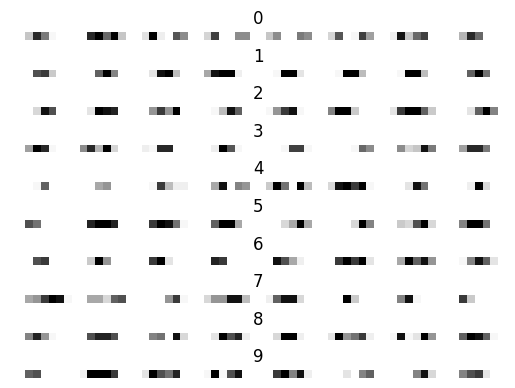

In [4]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(10, 1, i + 1)
    plt.axis("off")
    plt.title(digits.target[i])
    plt.imshow(digits.data[i:i + 1], cmap="Greys")
plt.show()

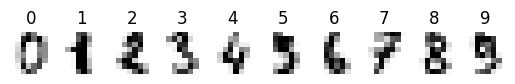

In [5]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis("off")
    plt.title(digits.target[i])
    plt.imshow(digits.images[i], cmap="Greys")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("train = ", len(X_train))
print("test = ", len(X_test))

train =  1347
test =  450


In [7]:
from sklearn import svm
from sklearn.metrics import accuracy_score

model = svm.SVC(kernel = "rbf", gamma = 0.001)
model.fit(X_train, y_train)
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率: ", score*100, "%")

正解率:  99.55555555555556 %


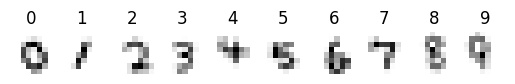

In [12]:
from PIL import Image

data_dir = "./data"

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis("off")
    image = Image.open(data_dir + "/" + str(i) + ".png").convert("L")
    image = image.resize((8, 8))
    plt.title(i)
    plt.imshow(image, cmap="gray")

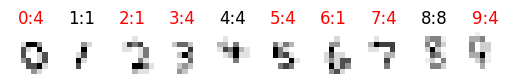

In [26]:
import numpy as np

for i in range(10):
    image = Image.open(data_dir + "/" + str(i) + ".png").convert("L")
    image = image.resize((8, 8))
    image = np.asarray(image, dtype=float)
    image = 16 - np.floor(17 * image / 256)
    image = image.flatten()
    pred = model.predict([image])
    
    plt.subplot(1, 10, i + 1)
    plt.axis("off")
    if i == pred[0]:
        font_color = "black"
    else:
        font_color = "red"
    plt.title(str(i) + ":" + str(pred[0]), color=font_color)
    plt.imshow(image.reshape(8, 8), cmap="Greys")

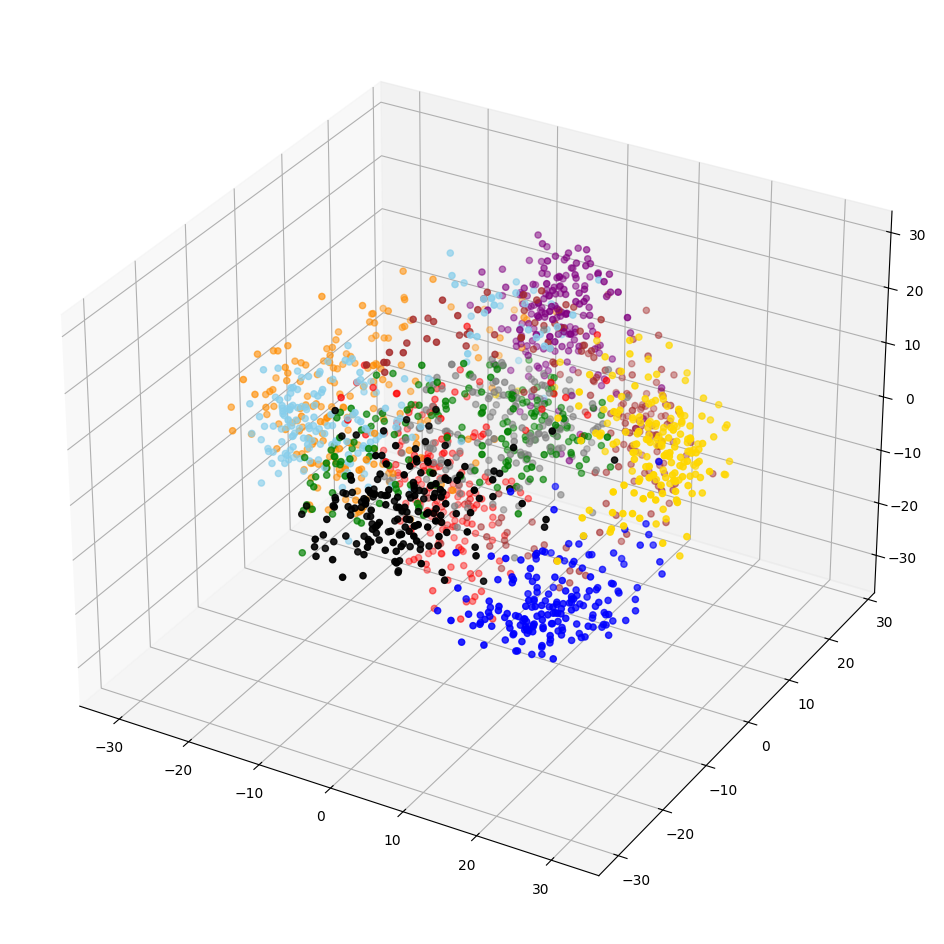

In [ ]:
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = digits.data
y = digits.target

number_color = ["BLACK", "BROWN", "RED", "DARKORANGE", "GOLD", "GREEN", "BLUE", "PURPLE", "GRAY", "SKYBLUE"]
colors = []

for i in y:
    colors.append(number_color[i])

pca = decomposition.PCA(n_components=3)
features_3 = pca.fit_transform(X)

df = pd.DataFrame(features_3)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection="3d")
ax.scatter(df[0], df[1], df[2], c=colors)
ty = 0
for col in number_color:
    ax.text(50, 30, 30 - ty * 5, str(ty), size = 20, color = col)
    ty += 1
plt.show()

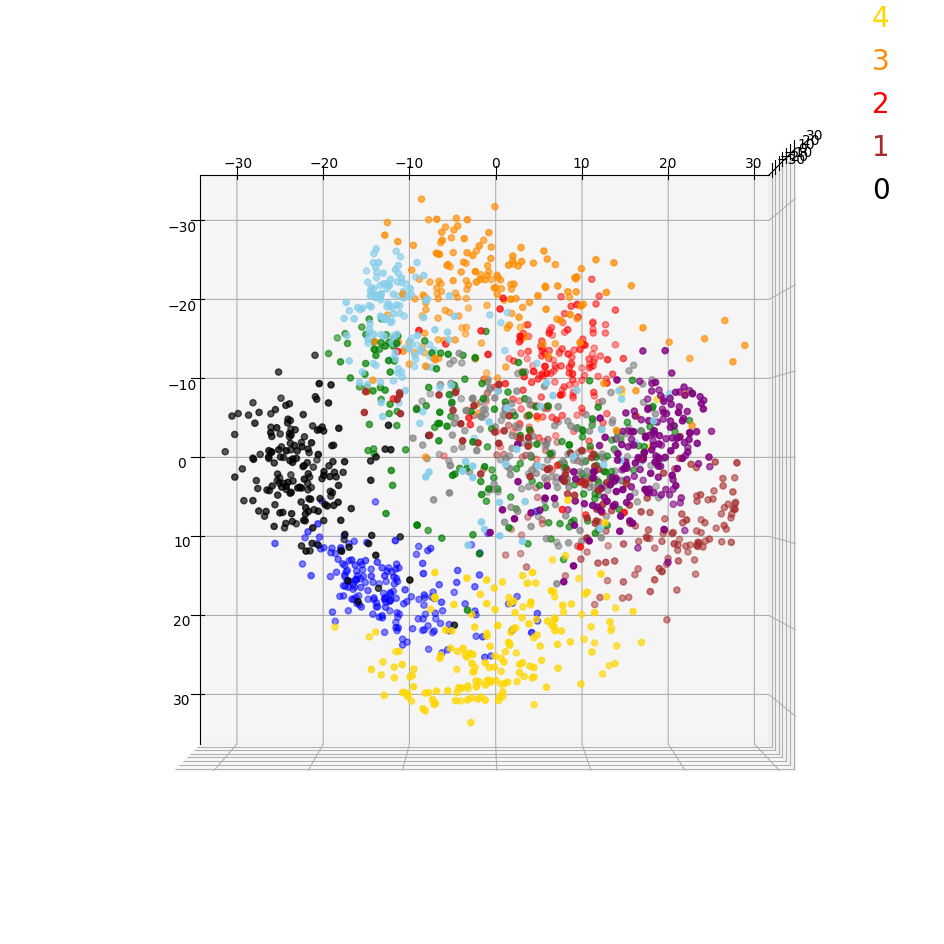

In [28]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection="3d")
ax.scatter(df[0], df[1], df[2], c=colors)
ty = 0
for col in number_color:
    ax.text(-30 - ty * 5, 40, 30, str(ty), size = 20, color = col)
    ty += 1
ax.view_init(90, 0)
plt.show()